# fortaleza Buoy - Quality Control Analysis

## Import libs

In [4]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [10]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
fortaleza_lims = pnboia_limits_tests.fortaleza

In [11]:
buoys_df_raw.index.levels[0].unique()

Index(['cabofrio', 'cabofrio2', 'fortaleza', 'itaguai', 'itajai_0', 'itaoca',
       'minuano', 'niteroi', 'ocas', 'porto_seguro', 'recife', 'rio_grande',
       'santos', 'vitoria'],
      dtype='object', name='buoy')

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [12]:
# filter data with

fortaleza = filter_data(data=buoys_df_raw,
                    buoy='fortaleza',
                    limits=fortaleza_lims,
                    outlier_check=False,
                    t_continuity_check=False)

fortaleza = fortaleza.drop(columns=fortaleza.filter(regex='dir|head|spread').columns)

# Filter bad period
# fortaleza = fortaleza.loc[:'2017-05']

# Filter bad srad data
# fortaleza = fortaleza.where(fortaleza['srad'] < 1500)

# # Drop all-nans columns
# fortaleza.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

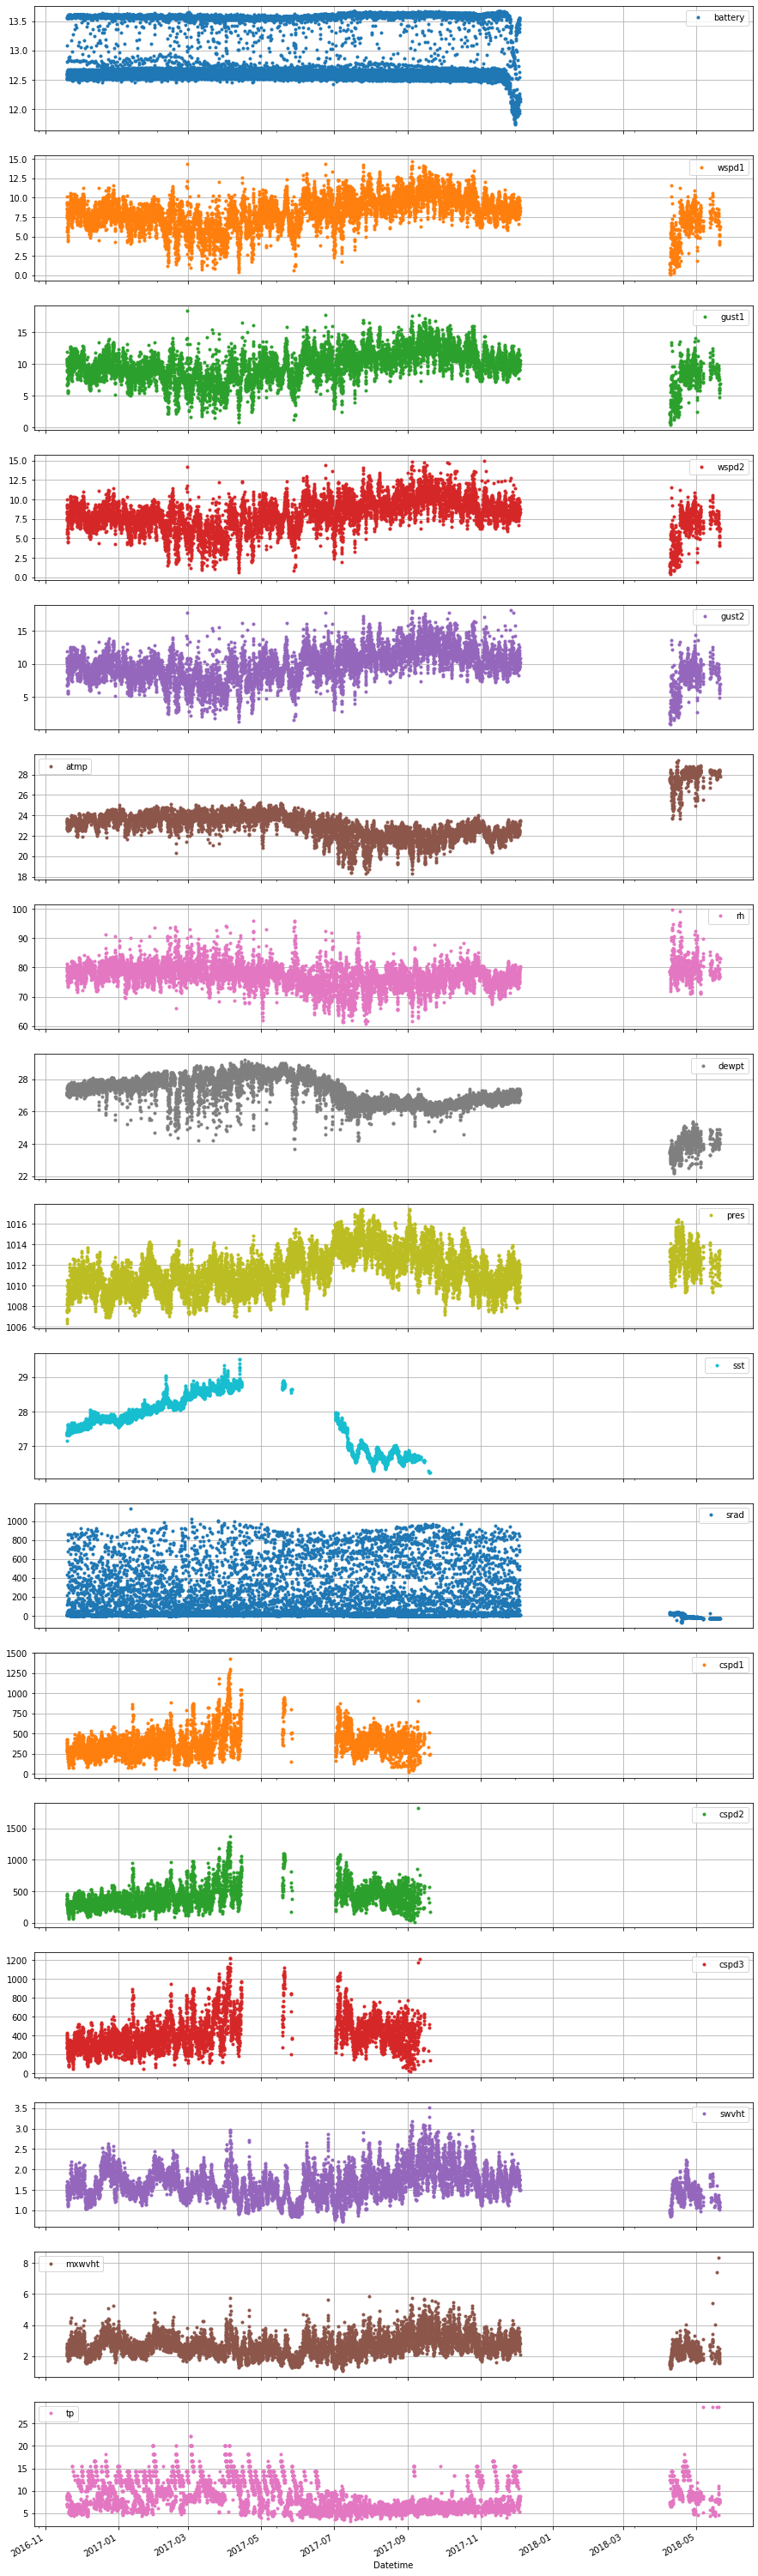

In [13]:
fortaleza.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

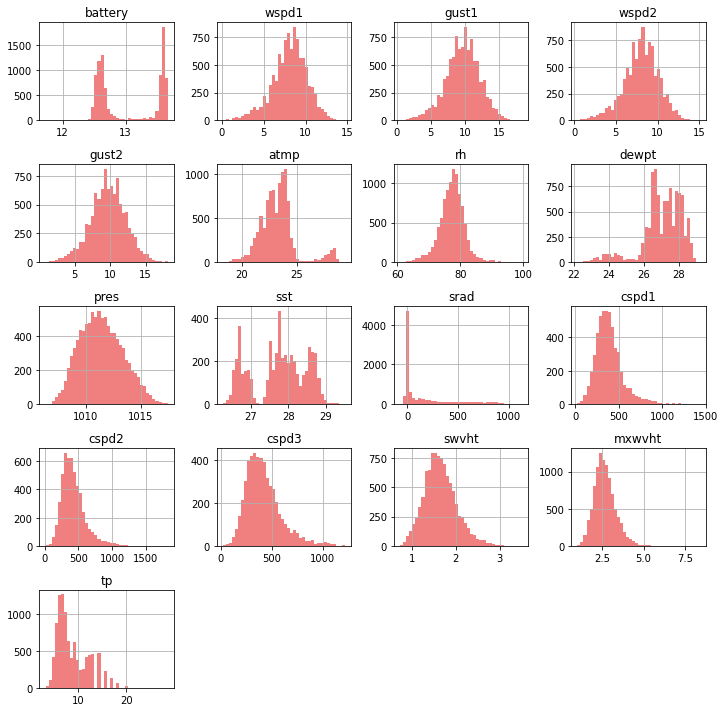

In [15]:
fortaleza.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [16]:
# Generated lims
fortaleza_out_lims_df_3 = gen_outlier_lim(fortaleza, buoy_name='fortaleza', std_factor=3).round(1)

# Generate lims dict
fortaleza_out_lims_dict_3 = manual_outlier_lims(fortaleza_out_lims_df_3, buoy_name='fortaleza')

# filter data with
fortaleza3 = filter_data(data=fortaleza,
                    buoy='fortaleza',
                    limits=fortaleza_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=fortaleza_out_lims_dict_3)

outlier_check done.


In [17]:
# Generated lims
fortaleza_out_lims_df_5 = gen_outlier_lim(fortaleza, buoy_name='fortaleza', std_factor=5).round(1)

# Generate lims dict
fortaleza_out_lims_dict_5 = manual_outlier_lims(fortaleza_out_lims_df_5, buoy_name='fortaleza')

# filter data with
fortaleza2 = filter_data(data=fortaleza,
                    buoy='fortaleza',
                    limits=fortaleza_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=fortaleza_out_lims_dict_5)

outlier_check done.


In [18]:
fortaleza_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.1,2.1,3.0,6.3,1.8,14.3
gust1,9.7,2.5,3.0,7.5,2.2,17.1
wspd2,8.0,2.1,3.0,6.3,1.8,14.3
gust2,9.7,2.5,3.0,7.6,2.1,17.3
atmp,23.3,1.6,3.0,4.9,18.3,28.2
rh,77.4,4.0,3.0,12.1,65.3,89.5
dewpt,27.0,1.2,3.0,3.5,23.5,30.6
pres,1011.4,1.9,3.0,5.8,1005.7,1017.2
sst,27.7,0.7,3.0,2.2,25.6,29.9


In [19]:
fortaleza_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.1,2.1,5.0,10.4,0.0,18.5
gust1,9.7,2.5,5.0,12.4,0.0,22.1
wspd2,8.0,2.1,5.0,10.5,0.0,18.5
gust2,9.7,2.5,5.0,12.6,0.0,22.3
atmp,23.3,1.6,5.0,8.2,15.1,31.5
rh,77.4,4.0,5.0,20.2,57.2,97.5
dewpt,27.0,1.2,5.0,5.8,21.2,32.9
pres,1011.4,1.9,5.0,9.6,1001.8,1021.0
sst,27.7,0.7,5.0,3.6,24.1,31.3


# Testing generated limits

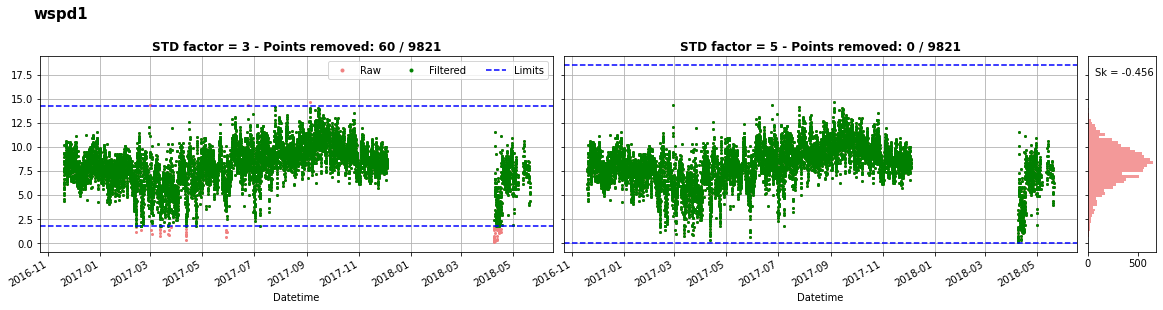

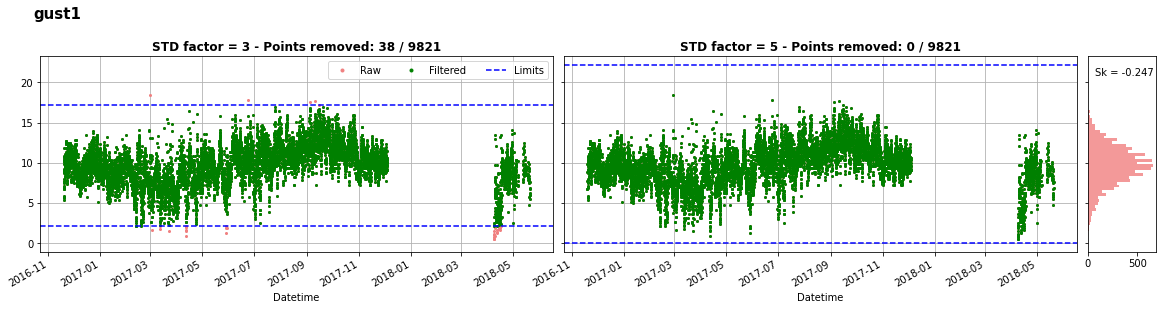

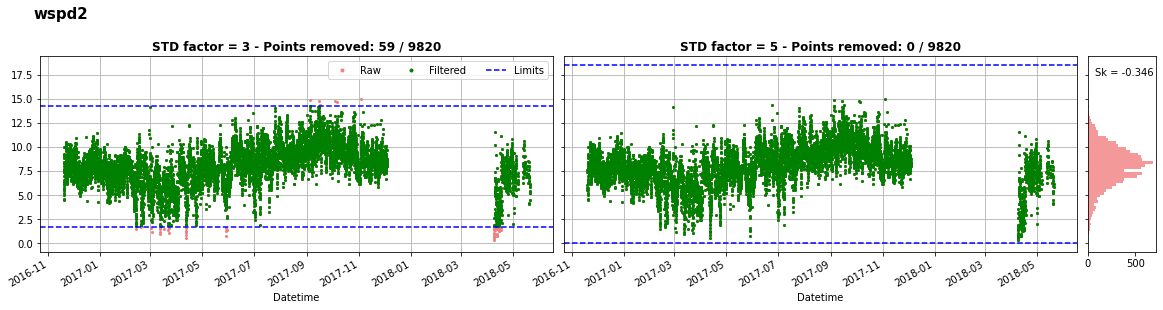

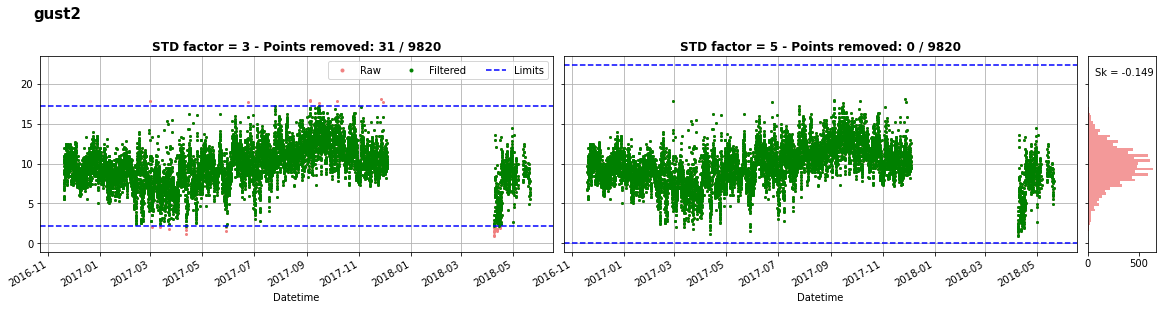

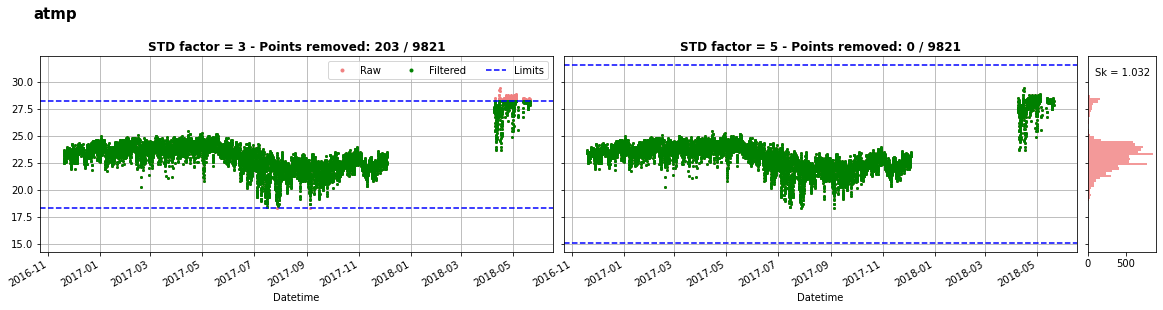

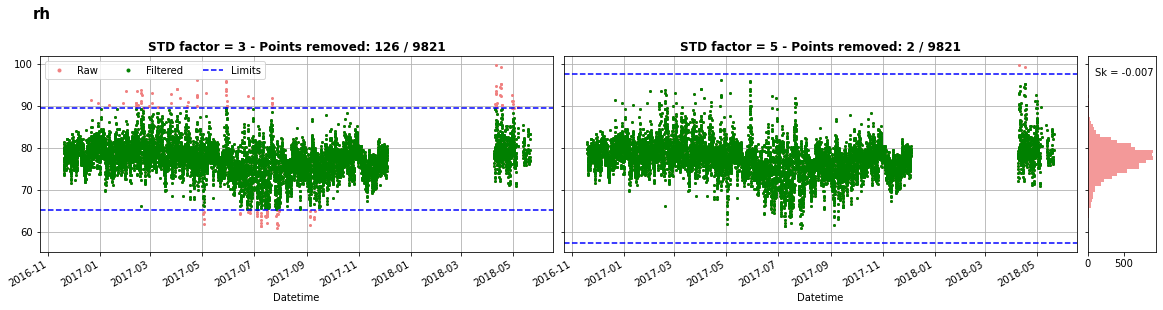

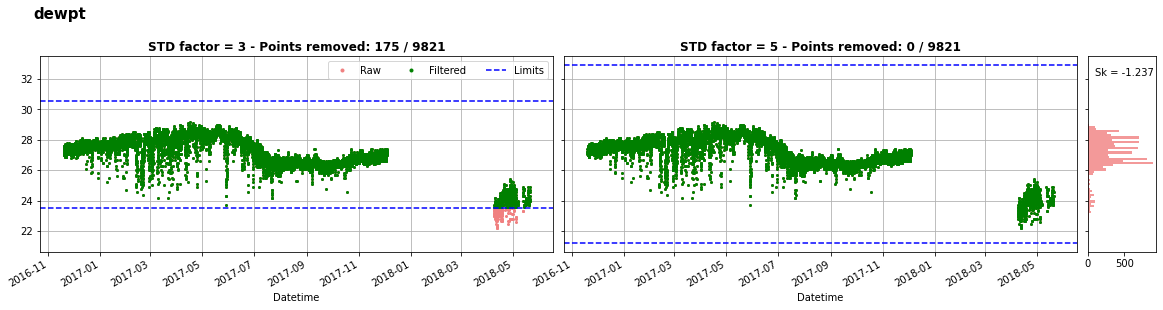

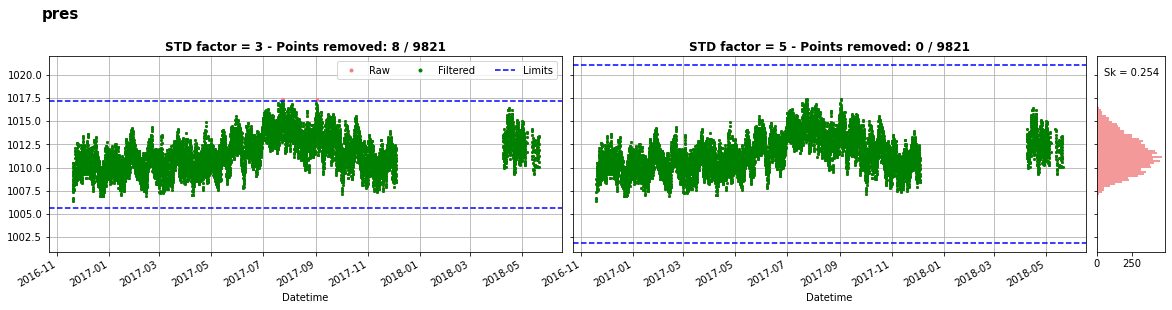

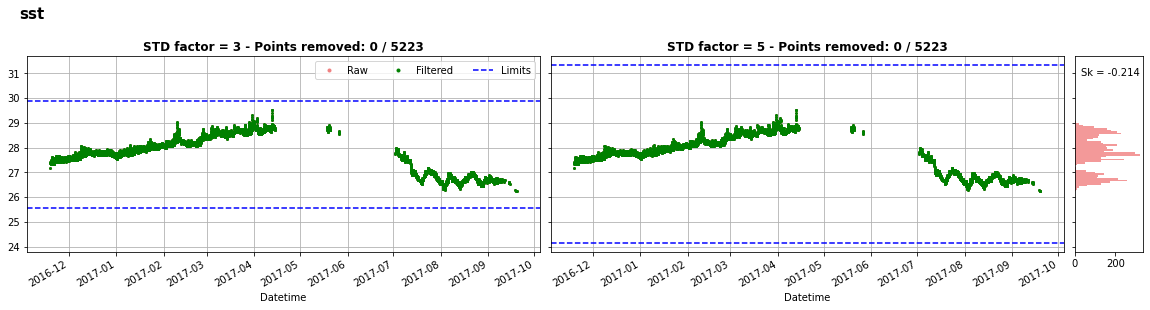

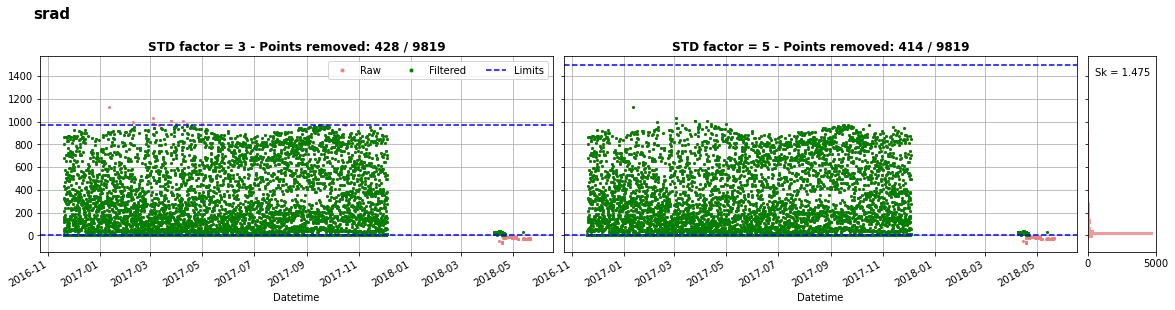

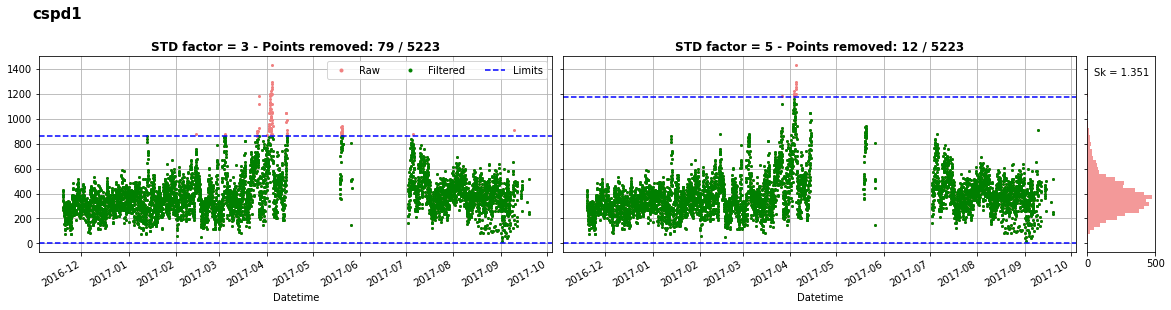

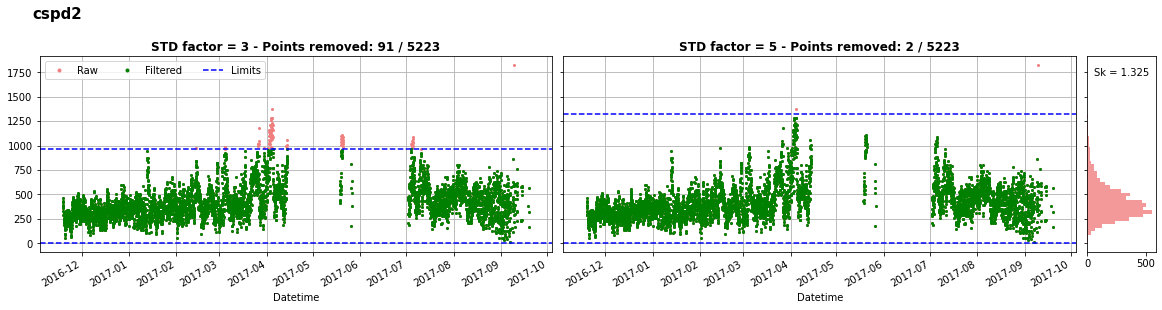

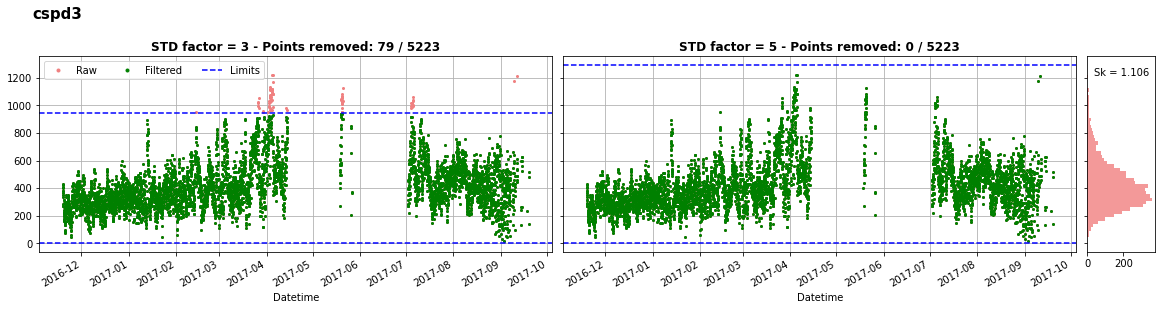

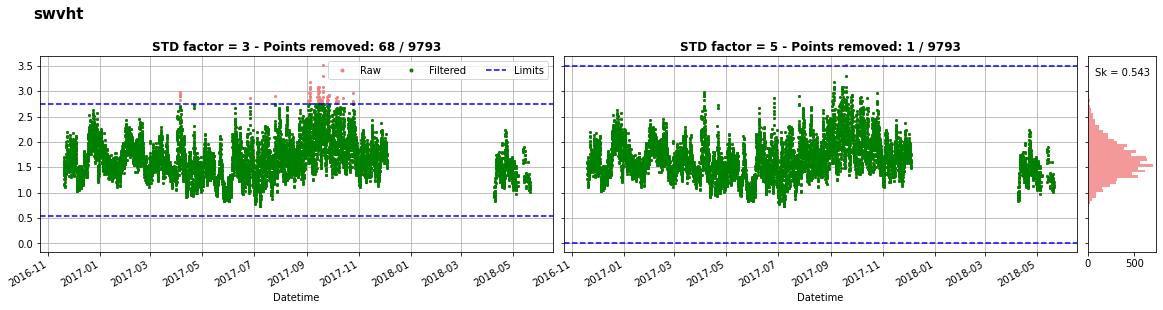

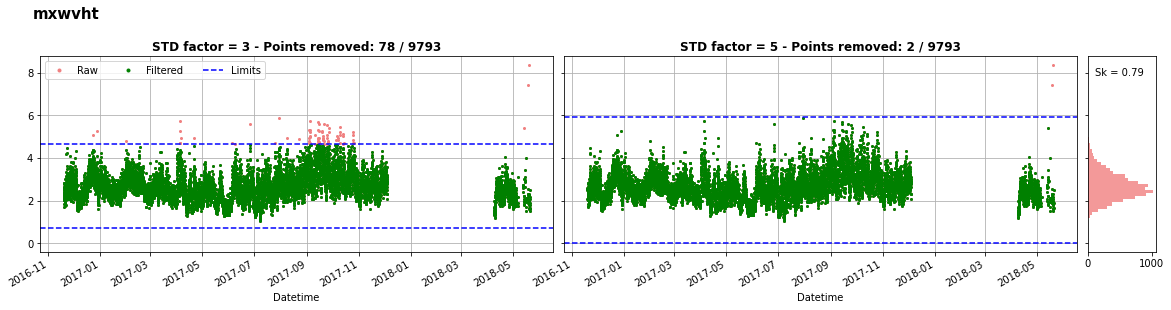

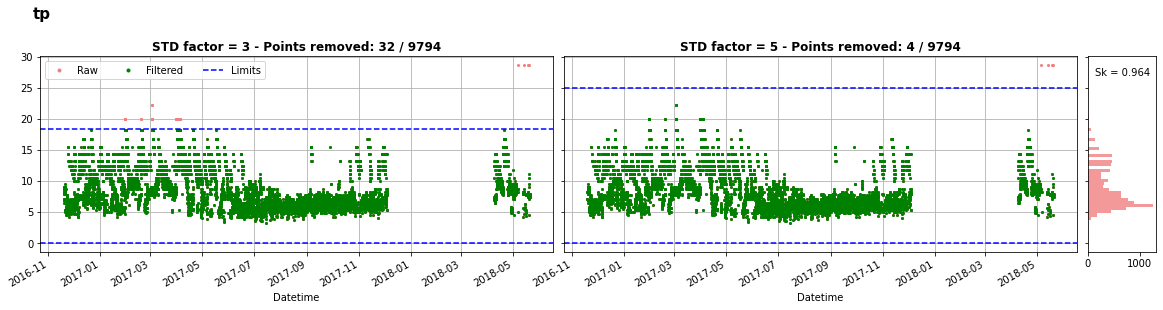

In [20]:
parameters = fortaleza.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=fortaleza,
                    limits=fortaleza_lims,
                    buoy='fortaleza',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

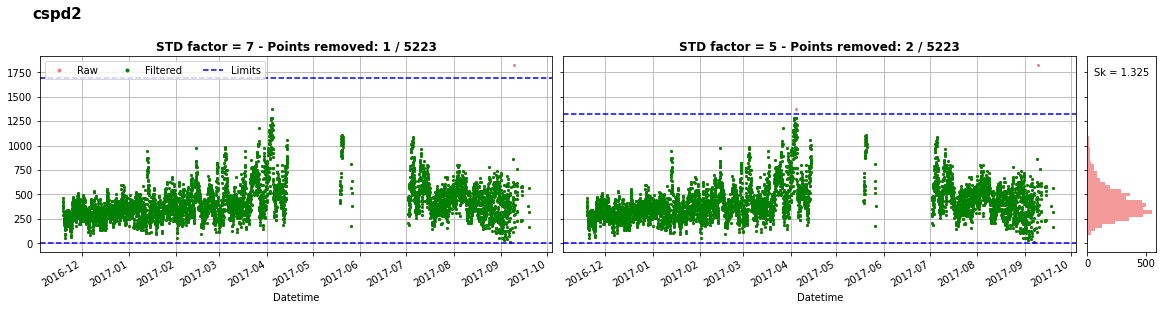

In [42]:
param = 'cspd2'
plot_comparison(factor1=7, 
                    factor2=5, 
                    data=fortaleza,
                    limits=fortaleza_lims,
                    buoy='fortaleza',
                    parameter=param)
plt.show()

In [43]:
factors = {
    "swvht": 5,
    "mxwvht": 6,
    "tp": 5,
    "wspd1": 4,
    "gust1": 4.5,
    "wspd2": 4,
    "gust2": 4.5,
    "atmp": 5,
    "rh": 6,
    "srad": 4,
    "pres": 4,
    "dewpt": 5,
    "sst": 4,
    "tp": 5,
    "cspd1": 7,
    "cspd2": 7,
    "cspd3": 7,
    }

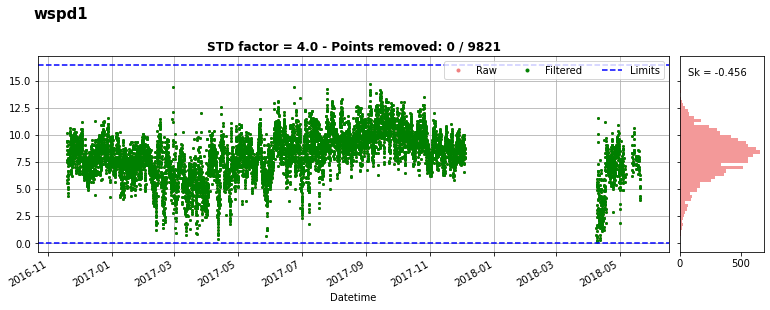

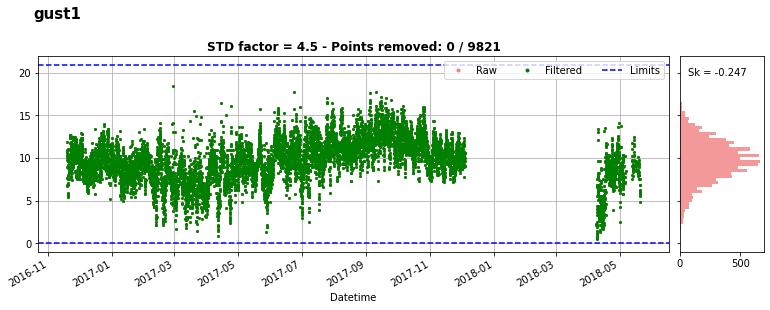

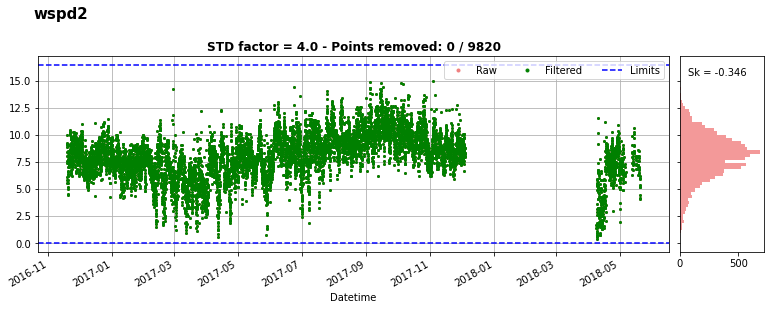

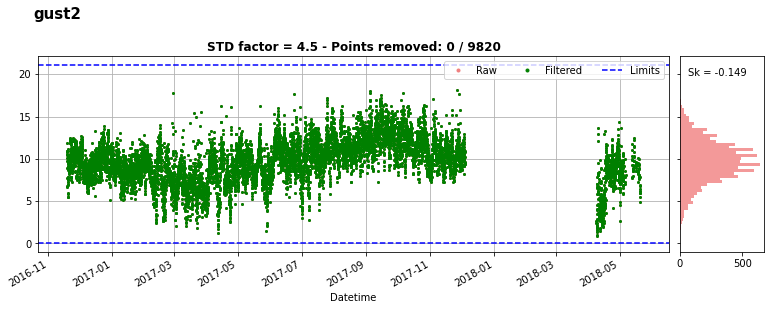

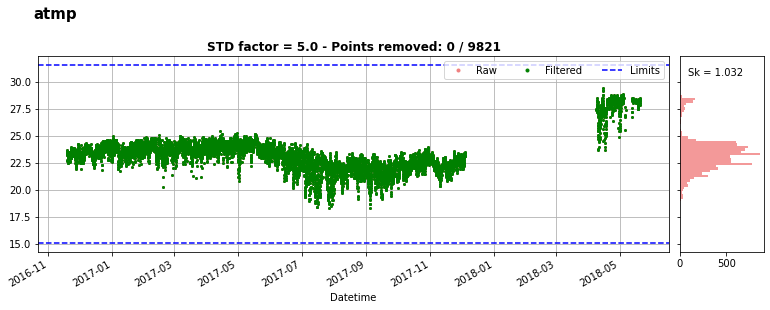

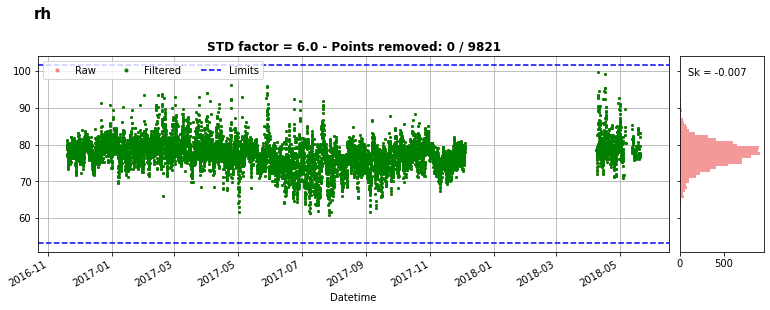

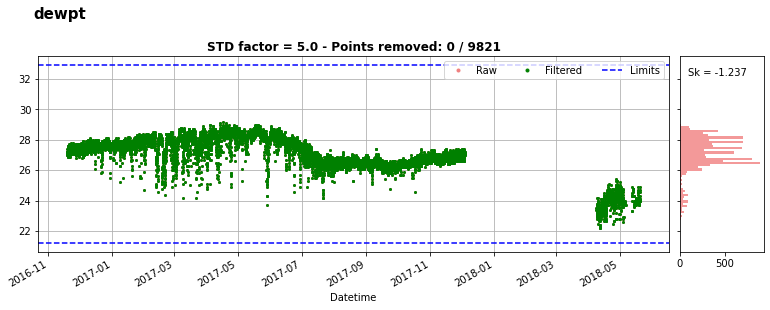

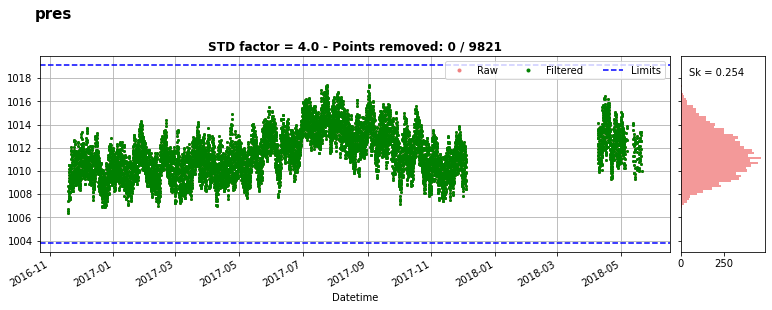

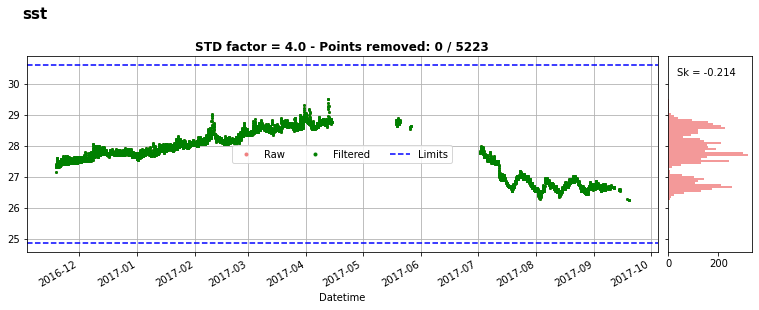

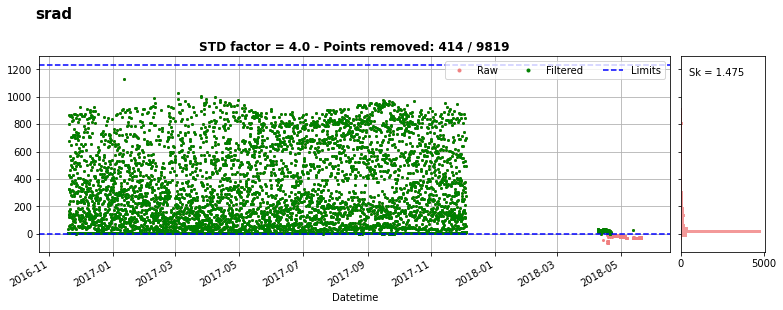

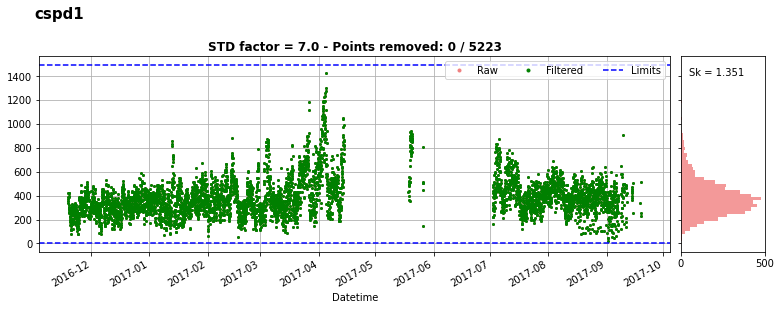

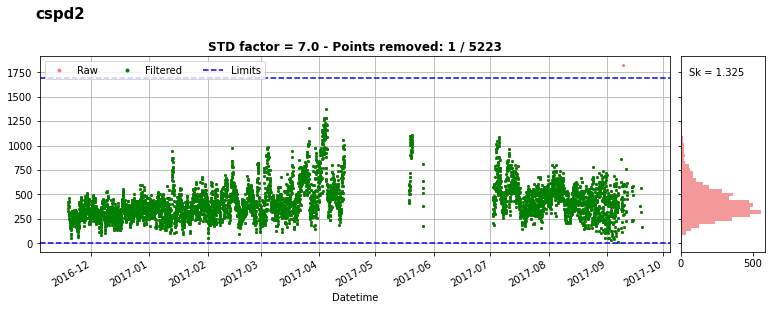

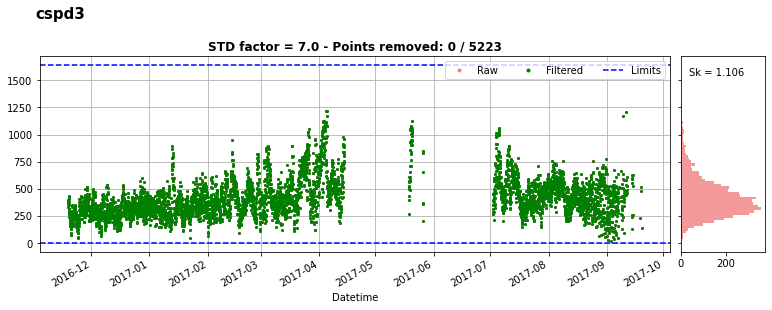

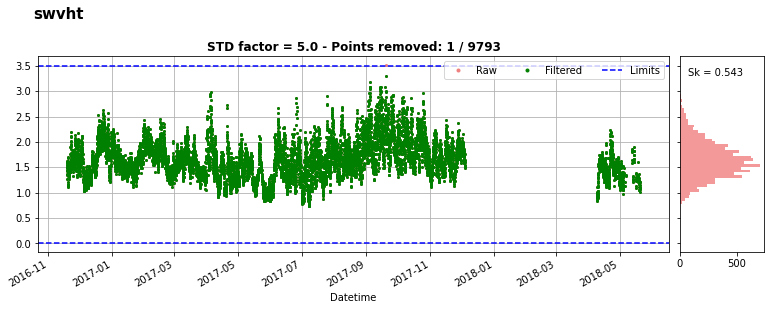

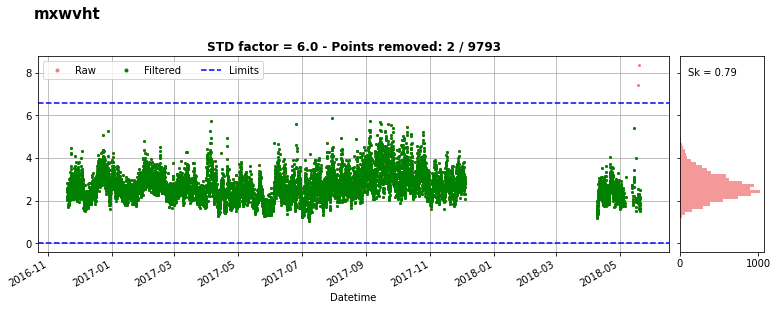

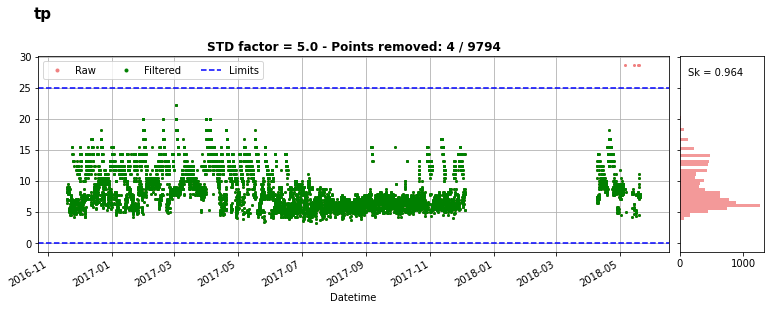

In [44]:
# FILTERING WITH DEFINITIVE FACTORS
fortaleza_notdir = fortaleza.drop(columns=fortaleza.filter(regex='dir|head|spread').columns)
parameters = fortaleza_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=fortaleza,
                    limits=fortaleza_lims,
                    buoy='fortaleza',
                    parameter=param)
    plt.show()

In [45]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 5,
    "mxwvht": 6,
    "tp": 5,
    "wspd1": 4,
    "gust1": 4.5,
    "wspd2": 4,
    "gust2": 4.5,
    "atmp": 5,
    "rh": 6,
    "srad": 4,
    "pres": 4,
    "dewpt": 5,
    "sst": 4,
    "tp": 5,
    "cspd1": 7,
    "cspd2": 7,
    "cspd3": 7,
    }

fortaleza_out_lims_df = gen_outlier_lim(data=fortaleza,
                                     buoy_name='fortaleza',
                                     std_factor=factors).round(1)

In [46]:
fortaleza_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,8.1,2.1,4.0,8.4,0.0,16.4
gust1,9.7,2.5,4.5,11.2,0.0,20.9
wspd2,8.0,2.1,4.0,8.4,0.0,16.4
gust2,9.7,2.5,4.5,11.4,0.0,21.1
atmp,23.3,1.6,5.0,8.2,15.1,31.5
rh,77.4,4.0,6.0,24.2,53.1,101.6
dewpt,27.0,1.2,5.0,5.8,21.2,32.9
pres,1011.4,1.9,4.0,7.7,1003.8,1019.1
sst,27.7,0.7,4.0,2.9,24.9,30.6


In [47]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
fortaleza_out_lims_dict = manual_outlier_lims(fortaleza_out_lims_df, buoy_name='fortaleza')

In [48]:
fortaleza_out_lims_dict

{'wspd1': [0.0, 16.4],
 'gust1': [0.0, 20.9],
 'wspd2': [0.0, 16.4],
 'gust2': [0.0, 21.1],
 'atmp': [15.1, 31.5],
 'rh': [53.1, 101.6],
 'dewpt': [21.2, 32.9],
 'pres': [1003.8, 1019.1],
 'sst': [24.9, 30.6],
 'srad': [0.0, 1230.0],
 'cspd1': [0.0, 1493.1],
 'cspd2': [0.0, 1688.9],
 'cspd3': [0.0, 1637.9],
 'swvht': [0.0, 3.5],
 'mxwvht': [0.0, 6.6],
 'tp': [0.0, 24.9]}

In [49]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
fortaleza_definitive = filter_data(data=buoys_df_raw,
                    buoy='fortaleza',
                    limits=fortaleza_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=fortaleza_out_lims_dict)

outlier_check done.
